<a href="https://colab.research.google.com/github/Ayushkr236/Machine_Learninng_Model/blob/main/heart_disease_prediction_pkl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *
import joblib

In [6]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
df= pd.read_csv('/content/heart.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0])*100
print(f'Total percentage of missing data: {total_percentage:.2f}%')
duplicate = df[df.duplicated()]
print("duplicate rows")
duplicate
df=df.drop_duplicates()

Total percentage of missing data: 0.00%
duplicate rows


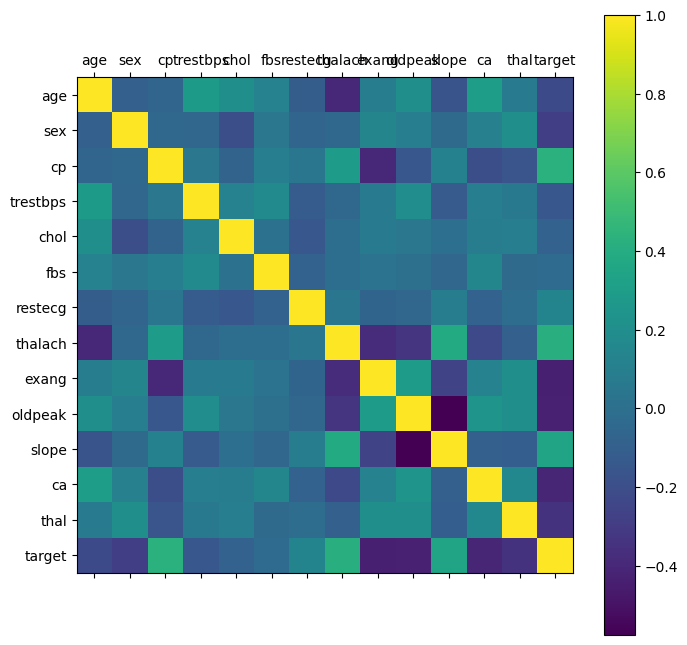

In [13]:
rcParams['figure.figsize'] = 14, 8
plt.matshow(df.corr())
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Text(0.5, 1.0, 'Count of each target class')

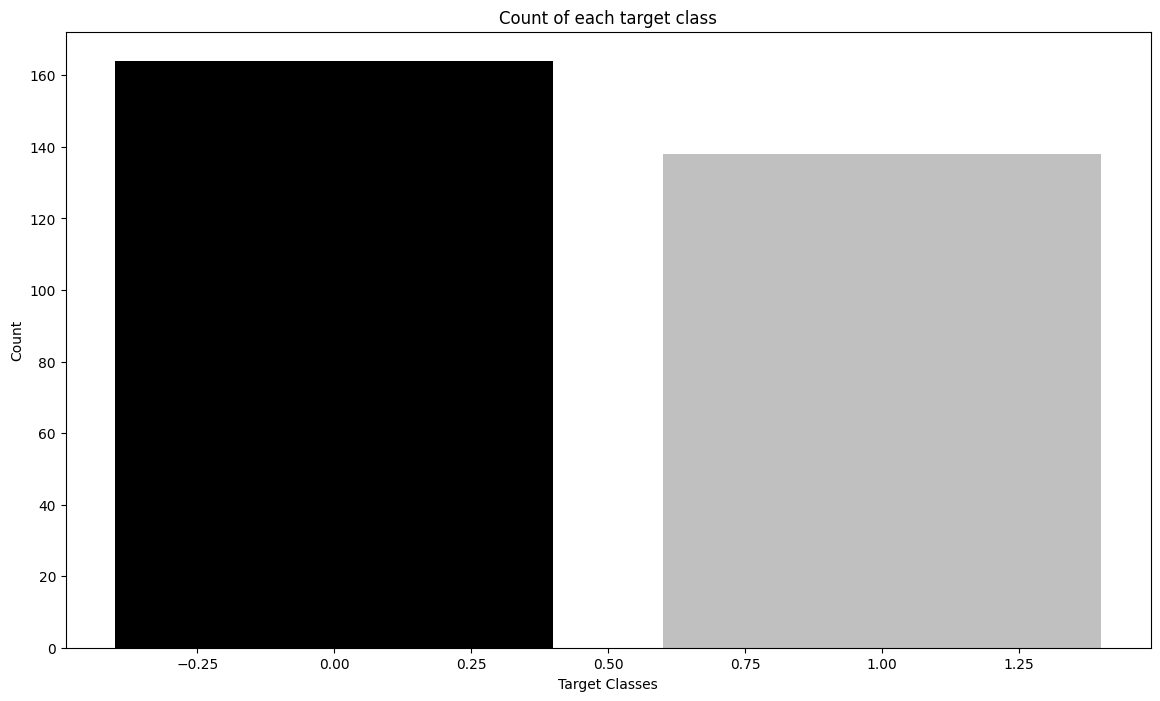

In [15]:
rcParams['figure.figsize'] = 14, 8
plt.bar(df['target'].unique(), df['target'].value_counts(), color=['black', 'silver'])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each target class')


#divide data into training testing classes

In [16]:
x = df.drop(['target'], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print("xTrain->", x_train.shape[0], "xTest->", x_test.shape[0])
print("yTrain->", y_train.shape[0], "yTest->", y_test.shape[0])
print("xTest->", x_test.shape)
print("yTrain->", y_train.shape)
print("yTest->", y_test.shape)

xTrain-> 181 xTest-> 121
yTrain-> 181 yTest-> 121
xTest-> (121, 13)
yTrain-> (181,)
yTest-> (121,)


#Model Building

#KNN Algorithm

In [17]:
knn_scores = []  # Changed variable name to knn_scores
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train.values, y_train.values)
    score = round(knn_classifier.score(x_test.values, y_test.values), 2)  # Assign score to a temporary variable
    knn_scores.append(score)  # Append the score to the list

# Using the best k (assuming k=5 here)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train.values, y_train.values)
knn_predictions = knn_classifier.predict(x_test) # Renamed to knn_predictions for clarity
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.66      0.44      0.53        61
           1       0.57      0.77      0.66        60

    accuracy                           0.60       121
   macro avg       0.62      0.60      0.59       121
weighted avg       0.62      0.60      0.59       121



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

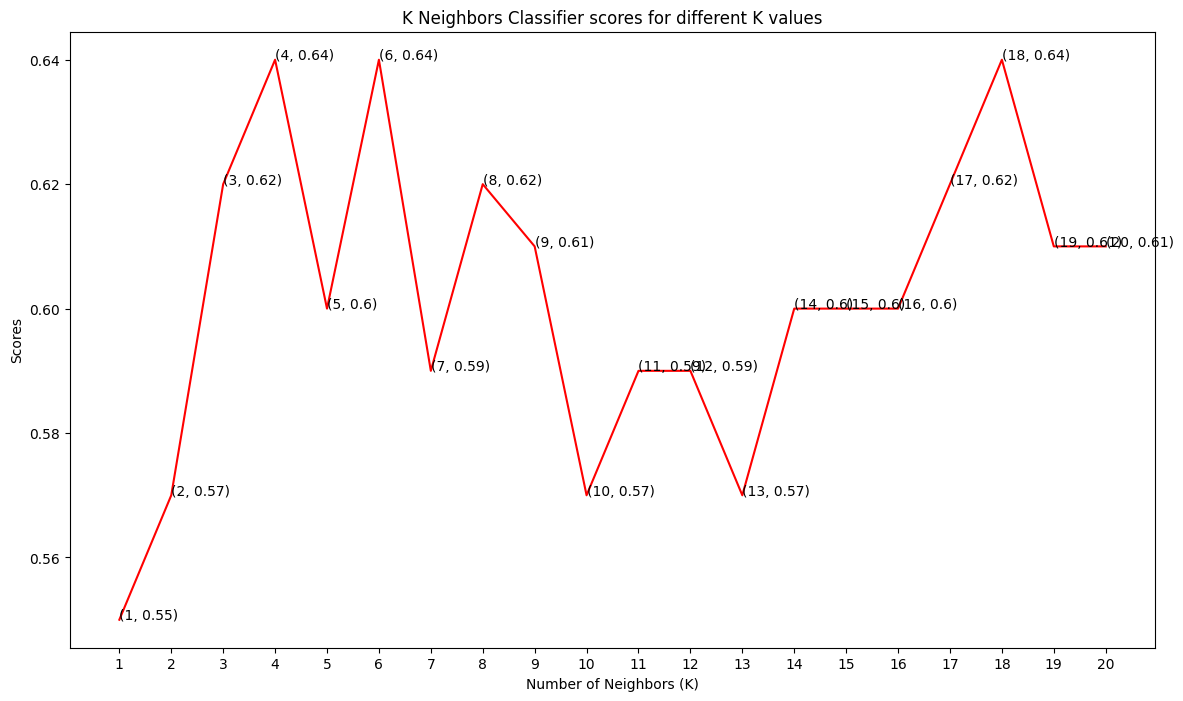

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


#Support vector machine

In [19]:
from sklearn.metrics import accuracy_score

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(x_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(x_test.values, y_test.values), 2))

svc_classifier= SVC(kernel=kernels[0])
svc_classifier.fit(x_train.values, y_train.values)
svc_prediction_result = svc_classifier.predict(x_test.values)
print(accuracy_score(y_test.values, svc_prediction_result))

0.7933884297520661


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

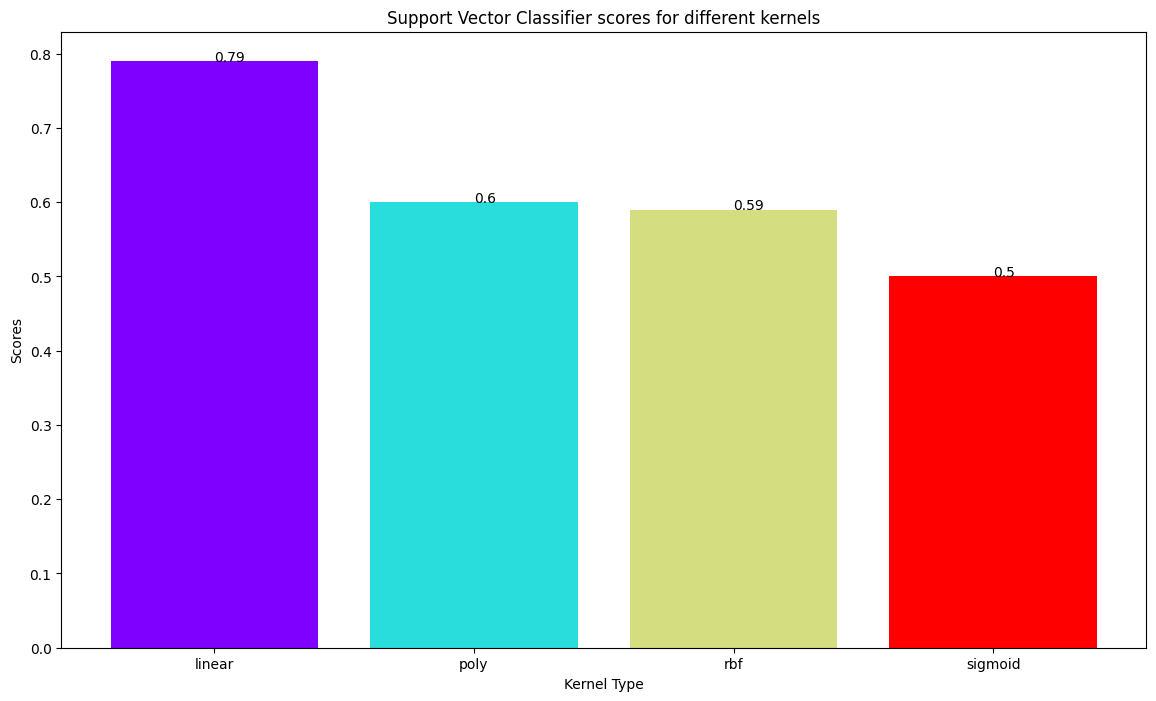

In [20]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color=colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernel Type')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

#Decision Tree

In [21]:
dt_scores = []
for i in range(2, 15):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(x_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(x_test.values, y_test.values), 2))
print("Done")

Done


In [22]:
print(dt_scores)

[0.64, 0.75, 0.73, 0.75, 0.74, 0.68, 0.79, 0.67, 0.78, 0.77, 0.69, 0.69, 0.69]


In [23]:
dt_classifier = DecisionTreeClassifier(max_features=13, random_state=0)
dt_classifier.fit(x_train.values, y_train.values)


DecisionTreeClassifier(max_features=13, random_state=0)

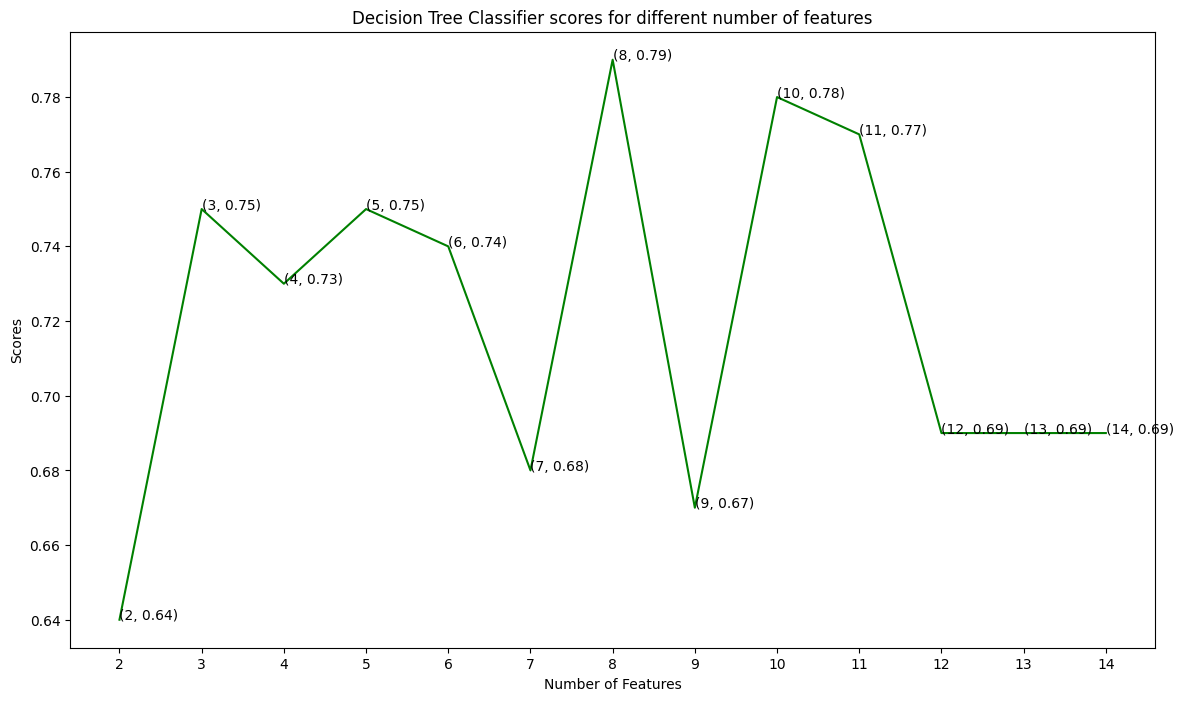

In [24]:
# Assuming 'dt_scores' is your list of scores
num_features = range(2, len(dt_scores) + 2)  # +2 to account for starting at 2

# Plot the scores
plt.plot(num_features, dt_scores, color='green')

# Add text labels for each point (optional)
for i, score in zip(num_features, dt_scores):
    plt.text(i, score, (i, score))

# Set x-axis ticks once
plt.xticks(num_features)

plt.xlabel('Number of Features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of features')
plt.show()

#Random Forest

In [25]:
estimators = [10,20,100,200,500]
rf_scores = []

best_estimator = 0
best_score = 0

for i in estimators:
    rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
    rf_model.fit(x_train.values, y_train.values)
    score = rf_model.score(x_test.values, y_test.values)
    rf_scores.append(round(rf_model.score(x_test.values, y_test.values), 2))

    if score > best_score:
        best_score = score
        best_estimator = i

print("Best estimator:", best_estimator)
print("Best score:", best_score)


Best estimator: 10
Best score: 0.7768595041322314


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

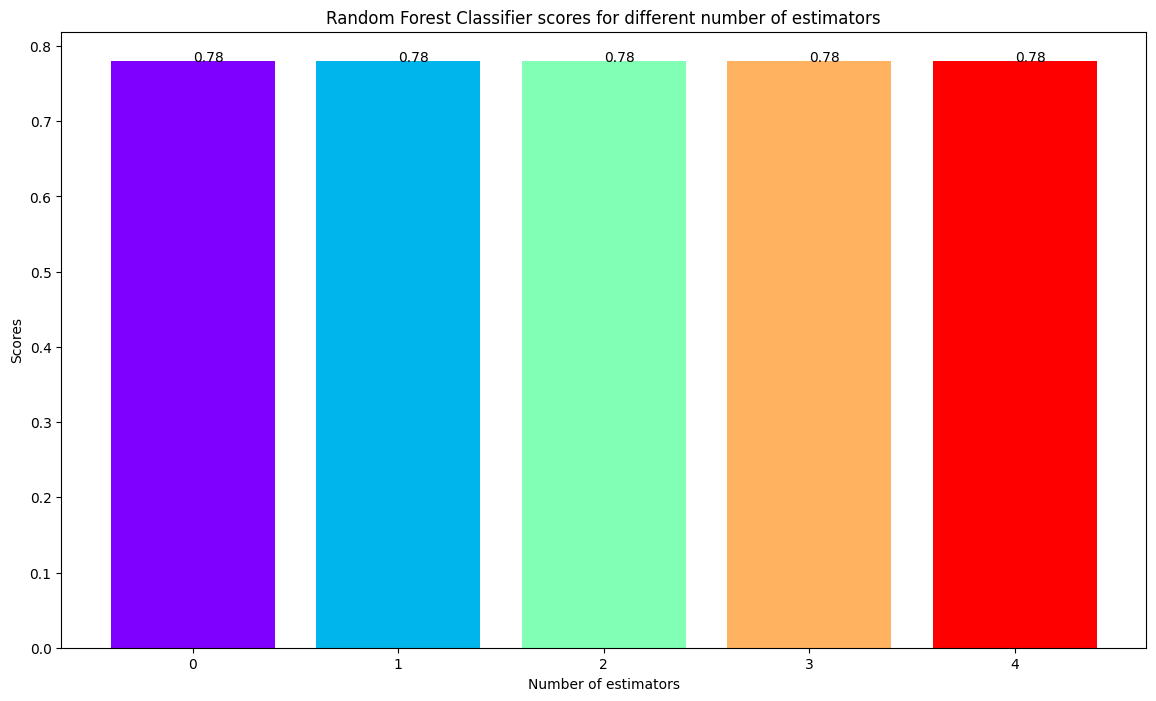

In [26]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [27]:
#from typing_extensions import final
#print("Retraining final model...")
final_model = RandomForestClassifier(n_estimators=best_estimator, random_state=42)
final_model.fit(x_train.values, y_train.values)

RandomForestClassifier(n_estimators=10, random_state=42)

#Logistic Regression

In [28]:
Logistic_model = LogisticRegression()
Logistic_model.fit(x_train.values, y_train.values)
Logistic_model_prediction = Logistic_model.predict(x_test.values)
print(accuracy_score(y_test.values, Logistic_model_prediction))
print(classification_report(y_test.values, Logistic_model_prediction))

0.8016528925619835
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        61
           1       0.78      0.83      0.81        60

    accuracy                           0.80       121
   macro avg       0.80      0.80      0.80       121
weighted avg       0.80      0.80      0.80       121



#Save Trained Models

In [29]:
import pickle
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier()

Logistic_model = LogisticRegression()


#all_models = [rf_model, Logistic_model, knn_classifier, svc_classifier, dt_classifier]
with open("model.pkl", "wb") as file:
    pickle.dump(final_model, file)
print("Done")

Done


In [30]:
open_file = open("model.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

RandomForestClassifier(n_estimators=10, random_state=42)
Done


In [31]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>